## CNM

In [1]:
import sys
sys.path.insert(0,'cnm-main')
from cnm import Clustering, TransitionProperties, Propagation
import numpy as np

In [2]:
from examples.helper import create_lorenz_data
from sklearn.cluster import KMeans

# CNM parameters:
# ---------------
K = 50 # Number of clusters
L = 22 # Model order

In [3]:
# Create the Lorenz data
data, dt = create_lorenz_data()
t = np.arange(data.shape[0]) * dt

# Clustering
# ----------
cluster_config = {
        'data': data,
        'cluster_algo': KMeans(n_clusters=K,max_iter=300,n_init=10),
        'dataset': 'lorenz',
        }

clustering = Clustering(**cluster_config)

# Transition properties
# ---------------------
transition_config = {
        'clustering': clustering,
        'dt': dt,
        'K': K,
        'L': L,
        }

transition_properties = TransitionProperties(**transition_config)

# Propagation
# -----------
propagation_config = {
        'transition_properties': transition_properties,
        }

ic = 0 # Index of the centroid to start in
t_total = 950
dt_hat = dt # To spline-interpolate the centroid-to-centroid trajectory

propagation = Propagation(**propagation_config)
t_hat, x_hat = propagation.run(t_total,ic,dt_hat)

Perform clustering
------------------
Use 50 clusters
Read from output/lorenz\clustering-K50.npz


Identify the transition properties
----------------------------------
Model order: 22
Compute Q
Compute T
Average transition time: 0.053


Starting CNM propagation
------------------------
Total time: 950


Propagation progress: 100%|████████████████████████████████████████████████████████████████████▉| 9.999871206716284/10 [00:01<00:00,  5.75it/s]

## Plot the results

Plot phase space
----------------



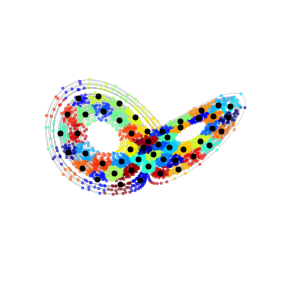

In [4]:
from examples.helper import (plot_phase_space, plot_time_series,plot_cpd,
                    plot_autocorrelation)

# phase space
plot_phase_space(data,clustering.centroids,clustering.labels)#,n_dim)

Plot time series
----------------



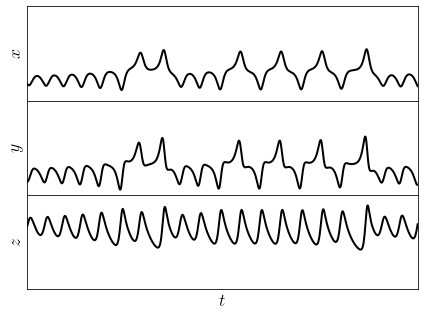

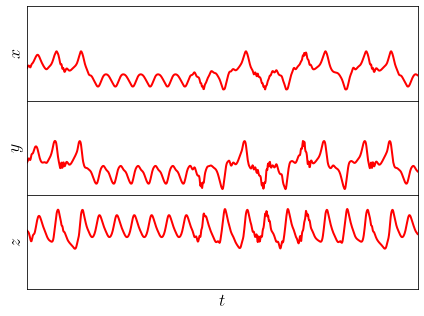

In [5]:
# time series
time_range = (45,60)
n_dim = 3
plot_label = ['x','y','z']
plot_time_series(t,data,t_hat,x_hat,time_range,plot_label,n_dim)

Plot cluster probability distribution
-------------------------------------



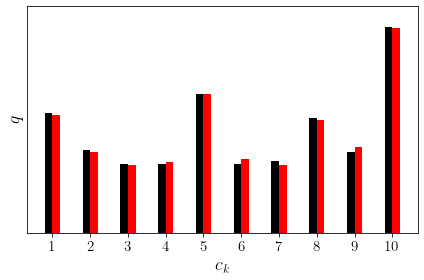

In [6]:
# cluster probability distribution
plot_cpd(data,x_hat)

Plot autocorrelation function
-----------------------------



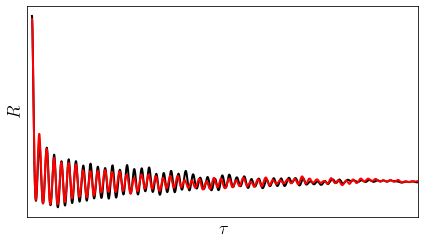

In [7]:
# autocorrelation function
time_blocks = 40
time_range = (-0.5,time_blocks)
plot_autocorrelation(t,data,t_hat,x_hat,time_blocks,time_range)